In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

## Step1: Reading and Understanding the data
        1. Importing DataSet using pandas library
        2. Understanding the structure of the data

In [2]:
car_data = pd.read_csv("CarPrice_Assignment.csv")
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
##Checking the missing values column wise
car_data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [4]:
##ID columns are Unique and Hence , its not advisable to use them for any analysis so dropping it
car_data = car_data.drop(['car_ID'], axis = 1)
car_data.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
## Checking the dimension of the Dataframe
car_data.shape

(205, 25)

In [6]:
## let's look at the statistical aspects of the dataframe
car_data.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
## Let's see the type of each column
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

## Step 2 : Data Cleaning and Exploratory Data Analysis
Cleanup carname to consider only company name as the independent variable for model building.

In order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s, where 1 is a          'gas' and 0 is a 'diesel' in fueltype. also in cylindernumber we change to numeric

In [9]:
## Let's see the CarNAme 
car_data['CarName'].value_counts()

CarName
toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: count, Length: 147, dtype: int64

In [10]:
## In carName there is two different values spliting it
car_data['brand'] = car_data['CarName'].str.split(expand = True)[0]
car_data['brand'].value_counts()

brand
toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: count, dtype: int64

In [11]:
## Converting all the brand names into lower case
car_data['brand'] = car_data['brand'].apply(lambda x : x.lower())

In [12]:
## Correcting the wrong named in the dataset

car_data.loc[(car_data['brand'] == 'vw') | (car_data['brand'] == 'vokswagen'), 'brand'] = 'volkswagen'
car_data.loc[(car_data['brand'] == 'toyouta'), 'brand'] = 'toyota'
car_data.loc[(car_data['brand'] == 'maxda'), 'brand'] = 'mazda'
car_data.loc[(car_data['brand']) == 'porcshce', 'brand'] = 'porcshe'

In [13]:
car_data['brand'].value_counts()

brand
toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
porcshe         1
Name: count, dtype: int64

In [14]:
### Now dropping the CarName
car_data.drop('CarName', axis = 1, inplace = True)

In [15]:
car_data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [16]:
car_data['fueltype'].value_counts()

fueltype
gas       185
diesel     20
Name: count, dtype: int64

In [17]:
car_data['fueltype'] = car_data['fueltype'].map({ 'gas' : 1, 'diesel' : 0})
car_data['fueltype']

0      1
1      1
2      1
3      1
4      1
      ..
200    1
201    1
202    1
203    0
204    1
Name: fueltype, Length: 205, dtype: int64

In [18]:
car_data['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [19]:
# List of variables to map

varlist =  ['cylindernumber', 'doornumber']

# Defining the map function
def binary_map(x):
    return x.map({ 'two':2, 'three': 3, 'four':4, 'five':5, 'six': 6, 'eight': 8, 'twelve': 12})

# Applying the function to the housing list
car_data[varlist] = car_data[varlist].apply(binary_map)

In [20]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    int64  
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    int64  
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    int64  
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

In [21]:
car_data['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

In [22]:
car_data['enginetype'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [23]:
car_data['enginelocation'].unique()

array(['front', 'rear'], dtype=object)

In [24]:
car_data['drivewheel'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [25]:
car_data['fuelsystem'].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [26]:
# Converting variables with 2 values to 1 and 0
car_data['aspiration'] = car_data['aspiration'].map({ 'std': 1, 'turbo': 0 })

car_data['enginelocation'] = car_data['enginelocation'].map({ 'front': 1, 'rear': 0})


In [27]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    int64  
 2   aspiration        205 non-null    int64  
 3   doornumber        205 non-null    int64  
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    int64  
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    int64  
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

In [28]:
num_car_data = car_data.select_dtypes(include=['float64','int64'])
num_car_data.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,1,1,2,1,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,1,1,2,1,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,1,2,1,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,1,1,4,1,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,1,1,4,1,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0


## Step3: Visualizing the data

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

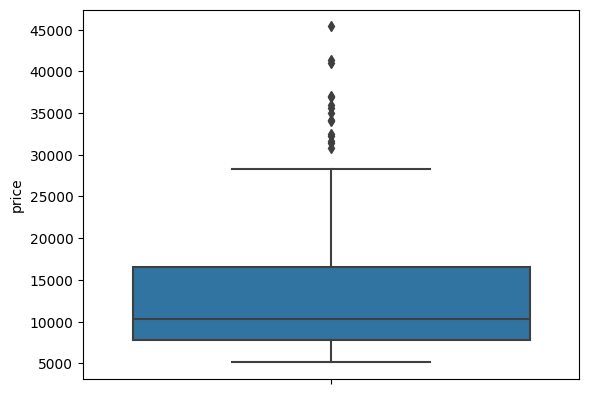

In [30]:
# Check the outliers in price column

sns.boxplot(y = 'price', data = car_data)
plt.show()

In [31]:
###Remove outliers from price column as the difference between the mean and max value seems to be high.
### Removing values beyond 90% in price column

quartile = car_data['price'].quantile(0.90)
car_data = car_data[car_data["price"] < quartile]
car_data["price"].describe()  

count      184.000000
mean     11052.962864
std       4326.276470
min       5118.000000
25%       7609.000000
50%       9594.000000
75%      14062.250000
max      22470.000000
Name: price, dtype: float64

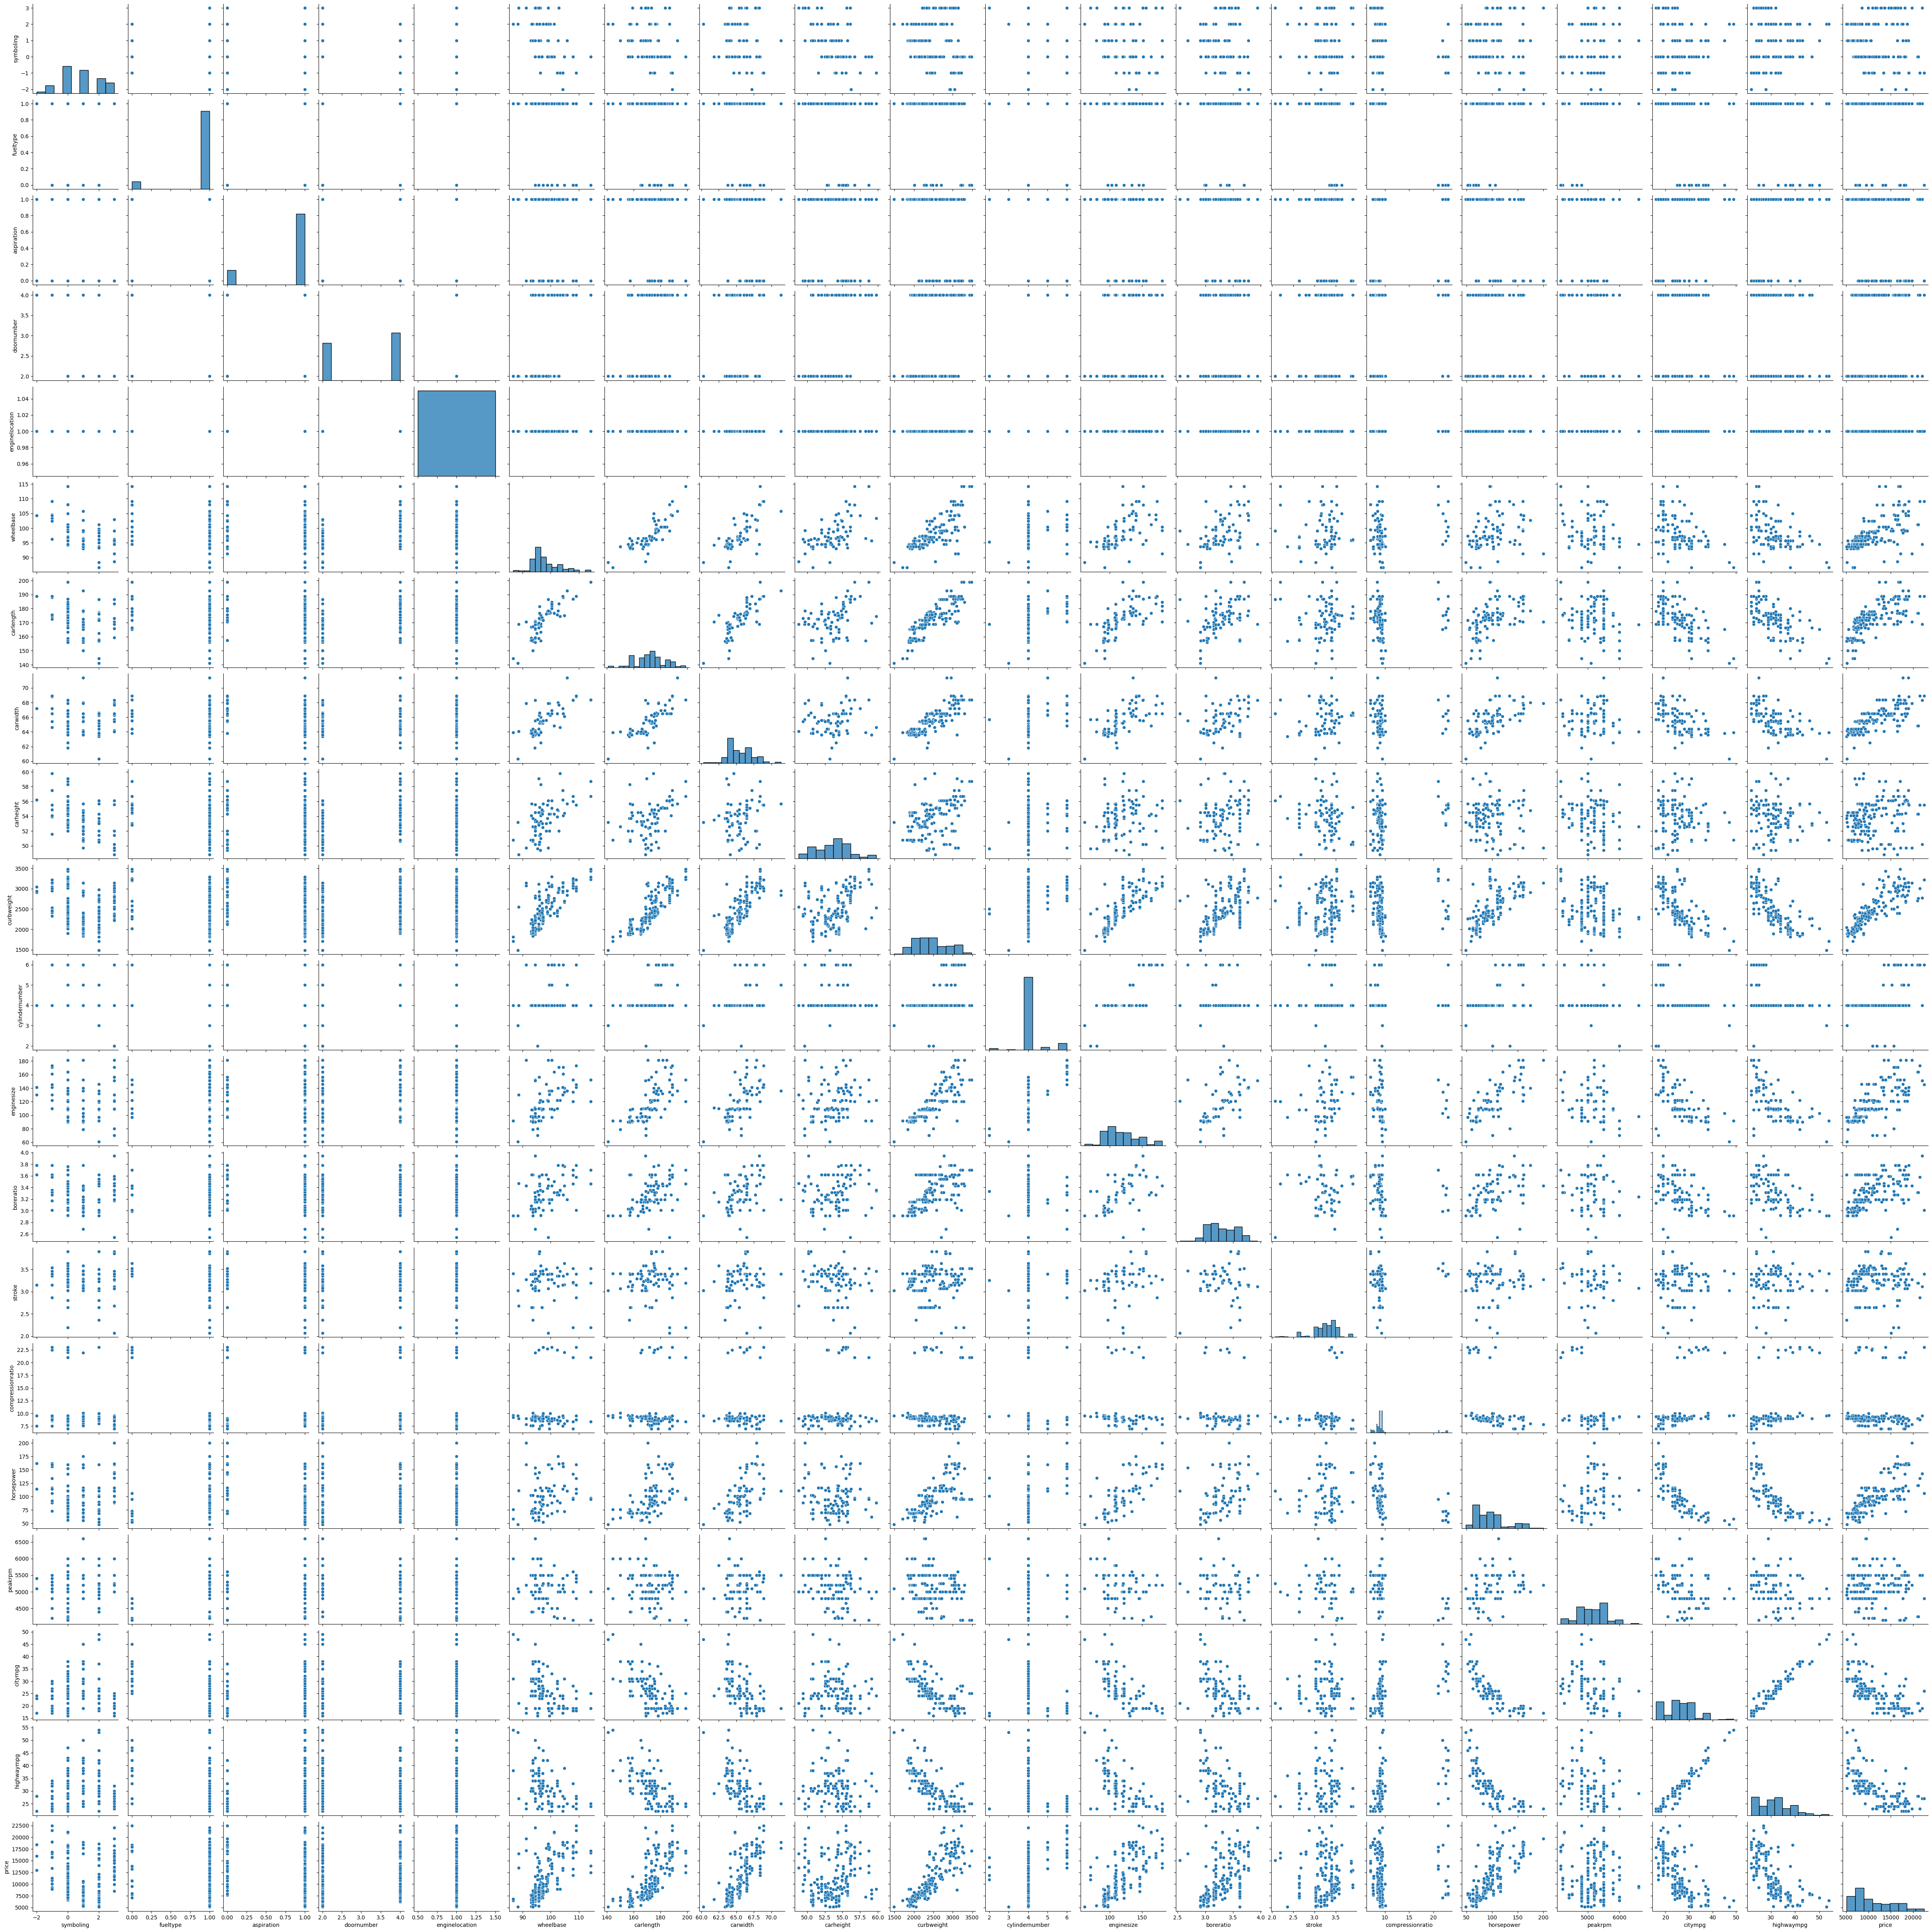

In [32]:
sns.pairplot(car_data)
plt.show()

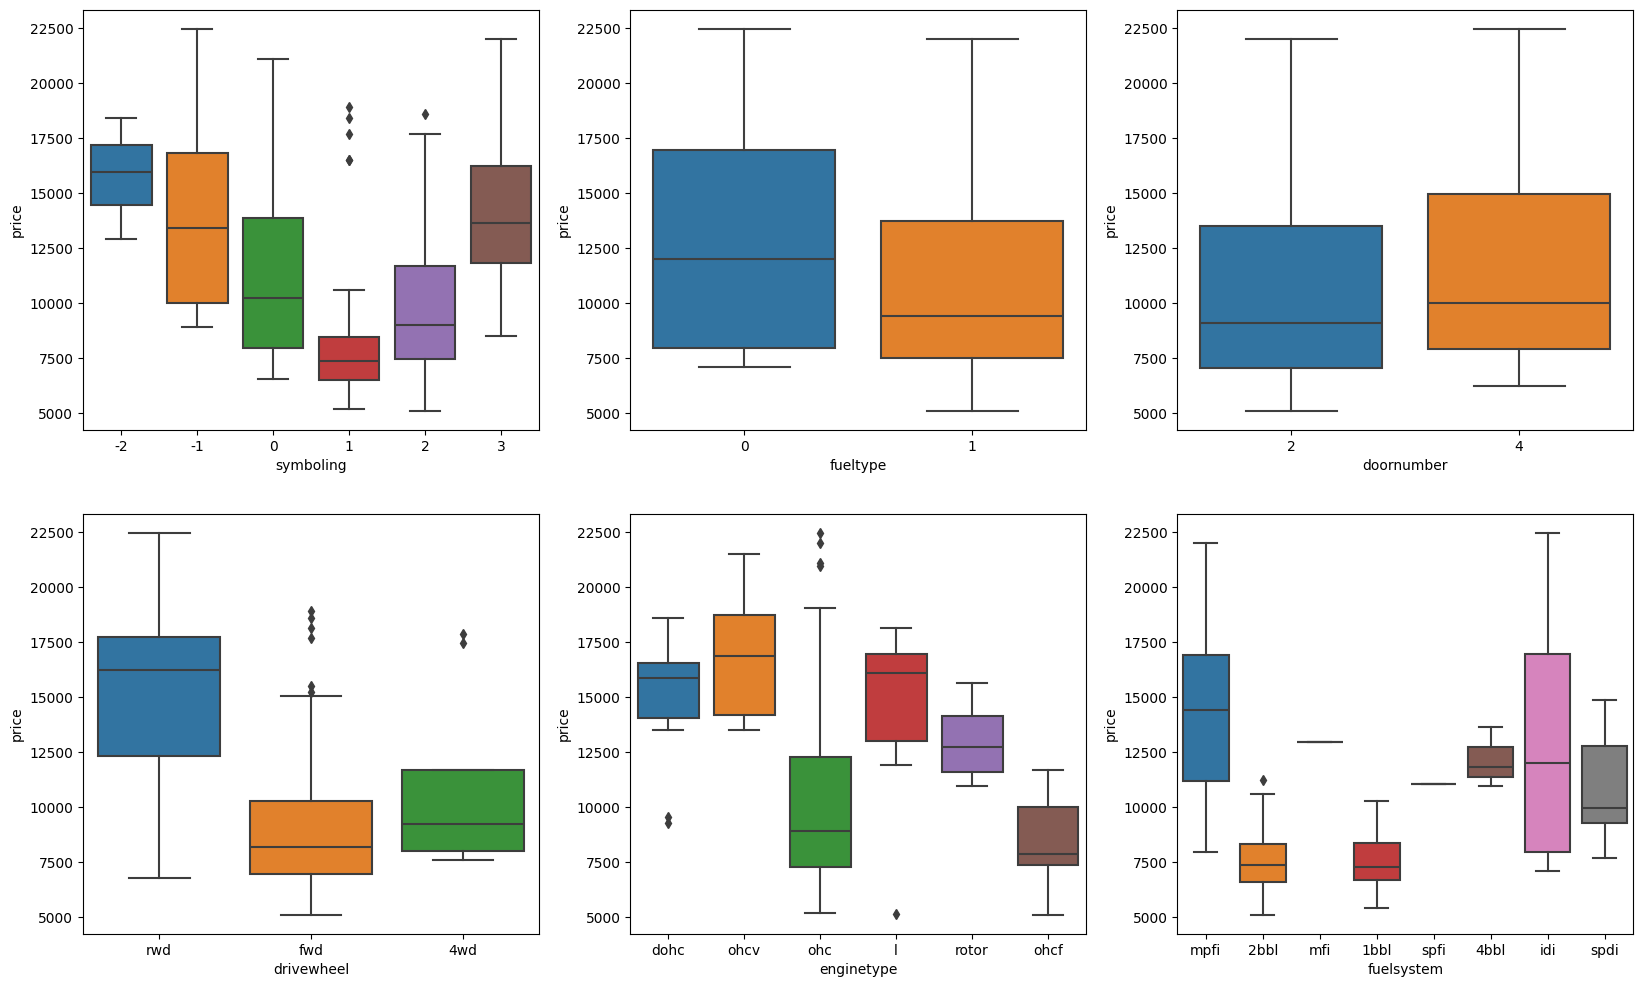

In [33]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'symboling', y = 'price', data = car_data)
plt.subplot(2,3,2)
sns.boxplot(x = 'fueltype', y = 'price', data = car_data)
plt.subplot(2,3,3)
sns.boxplot(x = 'doornumber', y = 'price', data = car_data)
plt.subplot(2,3,4)
sns.boxplot(x = 'drivewheel', y = 'price', data = car_data)
plt.subplot(2,3,5)
sns.boxplot(x = 'enginetype', y = 'price', data = car_data)
plt.subplot(2,3,6)
sns.boxplot(x = 'fuelsystem', y = 'price', data = car_data)
plt.show()

In [34]:
cat_car_data = car_data.select_dtypes(include=["object"])
cat_car_data.head()

,carbody,drivewheel,enginetype,fuelsystem,brand
0,convertible,rwd,dohc,mpfi,alfa-romero
1,convertible,rwd,dohc,mpfi,alfa-romero
2,hatchback,rwd,ohcv,mpfi,alfa-romero
3,sedan,fwd,ohc,mpfi,audi
4,sedan,4wd,ohc,mpfi,audi


In [35]:
car_dummy = pd.get_dummies(cat_car_data, dtype = int,  drop_first = True)
car_dummy.head()

,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,...,brand_nissan,brand_peugeot,brand_plymouth,brand_porsche,brand_renault,brand_saab,brand_subaru,brand_toyota,brand_volkswagen,brand_volvo
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
car_df = pd.concat([car_data, car_dummy], axis = 1)

In [37]:
car_df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,brand_nissan,brand_peugeot,brand_plymouth,brand_porsche,brand_renault,brand_saab,brand_subaru,brand_toyota,brand_volkswagen,brand_volvo
0,3,1,1,2,convertible,rwd,1,88.6,168.8,64.1,...,0,0,0,0,0,0,0,0,0,0
1,3,1,1,2,convertible,rwd,1,88.6,168.8,64.1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,2,hatchback,rwd,1,94.5,171.2,65.5,...,0,0,0,0,0,0,0,0,0,0
3,2,1,1,4,sedan,fwd,1,99.8,176.6,66.2,...,0,0,0,0,0,0,0,0,0,0
4,2,1,1,4,sedan,4wd,1,99.4,176.6,66.4,...,0,0,0,0,0,0,0,0,0,0


In [38]:
car_df.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'brand', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi', 'brand_audi',
       'brand_bmw', 'brand_chevrolet', 'brand_dodge', 'brand_honda',
       'brand_isuzu', 'brand_mazda', 'brand_mercury', 'brand_mitsubishi',
       'brand_nissan', 'brand_peugeot', 'brand_plymouth', 'brand_porsche',
       'brand_renault', 'brand_sa

In [39]:
# Droping carbody	drivewheel	enginetype	fuelsystem	brand as we have created the dummies for it

car_df.drop(['carbody','drivewheel','enginetype','fuelsystem','brand'], axis = 1, inplace = True)

In [40]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 184 entries, 0 to 203
Data columns (total 57 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          184 non-null    int64  
 1   fueltype           184 non-null    int64  
 2   aspiration         184 non-null    int64  
 3   doornumber         184 non-null    int64  
 4   enginelocation     184 non-null    int64  
 5   wheelbase          184 non-null    float64
 6   carlength          184 non-null    float64
 7   carwidth           184 non-null    float64
 8   carheight          184 non-null    float64
 9   curbweight         184 non-null    int64  
 10  cylindernumber     184 non-null    int64  
 11  enginesize         184 non-null    int64  
 12  boreratio          184 non-null    float64
 13  stroke             184 non-null    float64
 14  compressionratio   184 non-null    float64
 15  horsepower         184 non-null    int64  
 16  peakrpm            184 non-null

In [41]:
car_df.shape

(184, 57)

## Step 4: Splitting the Data into Training and Testing Sets

In [42]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(car_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [43]:
# checking the df_train shape
df_train.shape

(128, 57)

#### Rescalling the Features with MinMax Scalling

In [44]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars =['symboling','fueltype', 'aspiration', 'doornumber', 'enginelocation', 'enginesize','horsepower', 
            'peakrpm', 'highwaympg', 'carlength', 'carheight', 'boreratio', 'stroke', 'price']


df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [45]:
df_train.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,brand_nissan,brand_peugeot,brand_plymouth,brand_porsche,brand_renault,brand_saab,brand_subaru,brand_toyota,brand_volkswagen,brand_volvo
105,1.0,1.0,0.0,0.0,0.0,91.3,0.512111,67.9,0.081818,3139,...,1,0,0,0,0,0,0,0,0,0
13,0.4,1.0,1.0,1.0,0.0,101.2,0.617647,64.8,0.500000,2765,...,0,0,0,0,0,0,0,0,0,0
21,0.6,1.0,1.0,0.0,0.0,93.7,0.280277,63.8,0.181818,1876,...,0,0,0,0,0,0,0,0,0,0
166,0.6,1.0,1.0,0.0,0.0,94.5,0.477509,64.0,0.345455,2300,...,0,0,0,0,0,0,0,1,0,0
162,0.4,1.0,1.0,1.0,0.0,95.7,0.435986,64.4,0.363636,2140,...,0,0,0,0,0,0,0,1,0,0


In [46]:
# Let's check the correlation coefficients to see which variables are highly correlated

# plt.figure(figsize = (10, 10))
# sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
# plt.show()
max(df_train.corr())

'wheelbase'

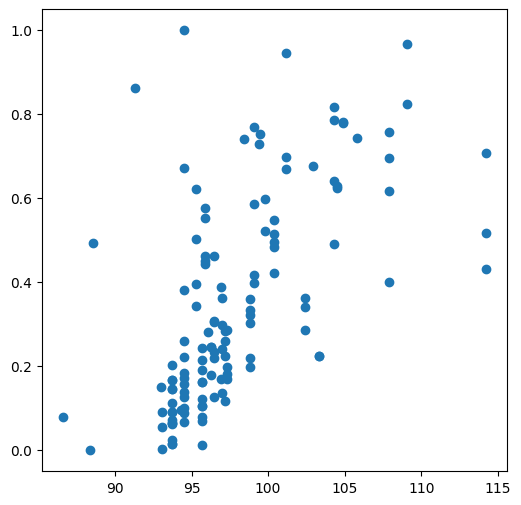

In [47]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.wheelbase, df_train.price)
plt.show()

#### Dividing into X and Y sets for the model building

In [48]:
y_train = df_train.pop('price')
X_train = df_train

## Step 5: Building the linear model
Fit a regression line through the training data using statsmodels. Remember that in statsmodels, you need to explicitly fit a constant using sm.add_constant(X) because if we don't perform this step, statsmodels fits a regression line passing through the origin, by default.

In [49]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [50]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=10) 
rfe = rfe.fit(X_train, y_train)

In [51]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 32),
 ('fueltype', True, 1),
 ('aspiration', False, 11),
 ('doornumber', False, 23),
 ('enginelocation', False, 44),
 ('wheelbase', False, 30),
 ('carlength', True, 1),
 ('carwidth', False, 34),
 ('carheight', False, 26),
 ('curbweight', False, 43),
 ('cylindernumber', False, 22),
 ('enginesize', False, 2),
 ('boreratio', False, 21),
 ('stroke', False, 4),
 ('compressionratio', False, 38),
 ('horsepower', True, 1),
 ('peakrpm', False, 33),
 ('citympg', False, 35),
 ('highwaympg', False, 13),
 ('carbody_hardtop', False, 45),
 ('carbody_hatchback', True, 1),
 ('carbody_sedan', True, 1),
 ('carbody_wagon', True, 1),
 ('drivewheel_fwd', False, 16),
 ('drivewheel_rwd', False, 31),
 ('enginetype_l', False, 6),
 ('enginetype_ohc', False, 42),
 ('enginetype_ohcf', False, 8),
 ('enginetype_ohcv', False, 24),
 ('enginetype_rotor', True, 1),
 ('fuelsystem_2bbl', False, 12),
 ('fuelsystem_4bbl', False, 18),
 ('fuelsystem_idi', False, 5),
 ('fuelsystem_mfi', False, 15),
 ('fue

In [52]:
#checking RFE columns
col = X_train.columns[rfe.support_]
col

Index(['fueltype', 'carlength', 'horsepower', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'enginetype_rotor', 'brand_audi',
       'brand_bmw', 'brand_porsche'],
      dtype='object')

In [53]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [54]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [55]:
#function for checking VIF

def checkVIF(X):
    vif = pd.DataFrame()
    vif['variable'] = X.columns    
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [56]:
# building MODEL #1

lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary()) 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     76.74
Date:                Sun, 10 Dec 2023   Prob (F-statistic):           1.34e-46
Time:                        20:59:28   Log-Likelihood:                 125.10
No. Observations:                 128   AIC:                            -228.2
Df Residuals:                     117   BIC:                            -196.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2872      0.07

In [57]:
#dropping constant to calculate VIF

X_train_rfe.drop('const', axis = 1, inplace=True)

In [58]:
#checking VIF

checkVIF(X_train_rfe)

,variable,VIF
1,carlength,18.57
0,fueltype,12.34
4,carbody_sedan,11.04
3,carbody_hatchback,8.32
2,horsepower,6.78
5,carbody_wagon,4.76
6,enginetype_rotor,1.10
7,brand_audi,1.10
8,brand_bmw,1.07
9,brand_porsche,1.05


In [59]:
#dopping enginetype_rotor because it has highest p-value .

X_train_new = X_train_rfe.drop(["enginetype_rotor"], axis = 1)

In [60]:
#building MODEL #2 after dropping enginetype_rotor

X_train_new = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     81.20
Date:                Sun, 10 Dec 2023   Prob (F-statistic):           2.55e-46
Time:                        21:00:17   Log-Likelihood:                 121.92
No. Observations:                 128   AIC:                            -223.8
Df Residuals:                     118   BIC:                            -195.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2851      0.07

In [61]:
#dropping constant to calculate VIF

X_train_new.drop('const', axis=1, inplace=True)

In [62]:
#checking VIF

checkVIF(X_train_new)

,variable,VIF
1,carlength,18.57
0,fueltype,12.33
4,carbody_sedan,11.04
3,carbody_hatchback,8.24
2,horsepower,6.74
5,carbody_wagon,4.76
6,brand_audi,1.10
7,brand_bmw,1.07
8,brand_porsche,1.05


In [63]:
#dopping carbody_sedan because it has the high VIF.

X_train_new = X_train_rfe.drop(["carlength"], axis = 1)

In [64]:
#building MODEL #3 after dropping brand_renault

X_train_new = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     62.16
Date:                Sun, 10 Dec 2023   Prob (F-statistic):           1.32e-40
Time:                        21:01:32   Log-Likelihood:                 107.49
No. Observations:                 128   AIC:                            -195.0
Df Residuals:                     118   BIC:                            -166.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.4867      0.07

In [65]:
#dropping constant to calculate VIF

X_train_new.drop('const', axis=1, inplace=True)

In [66]:
#checking VIF

checkVIF(X_train_new)

,variable,VIF
0,fueltype,11.94
2,carbody_hatchback,5.86
3,carbody_sedan,5.30
1,horsepower,3.79
4,carbody_wagon,2.32
5,enginetype_rotor,1.10
6,brand_audi,1.10
7,brand_bmw,1.07
8,brand_porsche,1.04


In [67]:
#dopping carbody_sedan because it has the high VIF value

X_train_new.drop(["carbody_sedan"], axis=1, inplace=True)

In [71]:
#building MODEL #4 after dropping fueltype

X_train_new = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit() # fitting the model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     66.67
Date:                Sun, 10 Dec 2023   Prob (F-statistic):           2.32e-40
Time:                        21:23:09   Log-Likelihood:                 104.53
No. Observations:                 128   AIC:                            -191.1
Df Residuals:                     119   BIC:                            -165.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3337      0.03

In [72]:
#dropping constant to calculate VIF

X_train_new.drop('const', axis=1, inplace=True)

In [73]:
#checking VIF

checkVIF(X_train_new)

,variable,VIF
0,fueltype,4.57
1,horsepower,3.67
2,carbody_hatchback,2.09
3,carbody_wagon,1.29
4,enginetype_rotor,1.10
5,brand_audi,1.10
6,brand_bmw,1.07
7,brand_porsche,1.04


In [74]:
#dopping carbody_wagon because it has high p value

X_train_new.drop(["carbody_wagon"], axis=1, inplace=True)

In [75]:
#building MODEL #5 after dropping fueltype

X_train_new = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit() # fitting the model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     76.74
Date:                Sun, 10 Dec 2023   Prob (F-statistic):           2.69e-41
Time:                        21:25:23   Log-Likelihood:                 104.47
No. Observations:                 128   AIC:                            -192.9
Df Residuals:                     120   BIC:                            -170.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3317      0.03

In [76]:
#dropping constant to calculate VIF

X_train_new.drop('const', axis=1, inplace=True)

In [77]:
#checking VIF

checkVIF(X_train_new)

,variable,VIF
0,fueltype,4.29
1,horsepower,3.62
2,carbody_hatchback,1.88
3,enginetype_rotor,1.10
4,brand_audi,1.08
5,brand_bmw,1.05
6,brand_porsche,1.04


In [79]:
#dopping enginetype_rotor because it has the high p-value

X_train_new.drop(["enginetype_rotor"], axis=1, inplace=True)

In [80]:
#building MODEL #5 after dropping enginetype_rotor

X_train_new = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit() # fitting the model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     86.49
Date:                Sun, 10 Dec 2023   Prob (F-statistic):           2.20e-41
Time:                        21:28:03   Log-Likelihood:                 102.24
No. Observations:                 128   AIC:                            -190.5
Df Residuals:                     121   BIC:                            -170.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3300      0.03

In [81]:
#dropping constant to calculate VIF

X_train_new.drop('const', axis=1, inplace=True)

In [82]:
#checking VIF

checkVIF(X_train_new)

,variable,VIF
0,fueltype,4.28
1,horsepower,3.59
2,carbody_hatchback,1.80
3,brand_audi,1.08
4,brand_bmw,1.05
5,brand_porsche,1.04


 Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

### Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [83]:
#calculating price on train set using the model built

y_train_price = lm.predict(X_train_new)

ValueError: shapes (128,6) and (7,) not aligned: 6 (dim 1) != 7 (dim 0)

In [71]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                
plt.xlabel('Errors', fontsize = 18)  

NameError: name 'y_train_price' is not defined

<Figure size 640x480 with 0 Axes>